

        Cross-validation (CV), bir makine öğrenimi modelinin performansını değerlendirmek için kullanılan bir yöntemdir. Veri seti, belirli bir sayıda katmana bölünür, her bir katman sırayla test seti olarak kullanılırken geri kalanlar eğitim seti olarak kullanılır. Model her bir katman üzerinde eğitilir ve test edilir. Bu işlem, modelin genel performansını daha güvenilir bir şekilde ölçmek ve aşırı/az öğrenme problemlerini tespit etmek amacıyla kullanılır.

RMSE (Root Mean Squared Error - Kök Ortalama Kare Hata):

        RMSE, bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçen bir hata metriğidir.
        Hesaplanışı: RMSE, her tahminin gerçek değerden olan farkın karesini alır, bu karelerin ortalamasını alır, ardından bu değerin karekökünü alır.
        Daha az hata için daha küçük RMSE değerleri arzu edilir.

MSE (Mean Squared Error - Ortalama Kare Hata):

        MSE, regresyon modelinin tahminlerinin gerçek değerlerden olan farkın karesinin ortalamasını temsil eder.
        Hesaplanışı: MSE, her tahminin gerçek değerden olan farkın karesini alır ve bu değerlerin ortalamasını alır.
        MSE'nin avantajı, hataların karelerini alarak negatif ve pozitif hataları dengelemesidir.

R2 Skoru (Coefficient of Determination - Determinasyon Katsayısı):

        R2 skoru, bağımsız değişkenin bağımlı değişkeni ne kadar iyi açıkladığını ölçen bir metriktir. 1'e ne kadar yakınsa, modelin veriyi o kadar iyi açıkladığı söylenir.
        Hesaplanışı: R2 skoru, varyasyonu açıklanan (model tarafından açıklanan) varyasyonun toplam varyasyona oranını ifade eder.
        1'e yaklaşan R2 skoru daha iyi bir model performansını gösterir, 0 ise modelin hiçbir şey açıklamadığını, negatif değerler ise modelin beklenenden daha kötü performans gösterdiğini gösterir.
        
Özetle, RMSE ve MSE, regresyon modellerinin tahmin hatalarını ölçmek için kullanılırken, R2 skoru modelin genel performansını değerlendirmek için kullanılır.

pd.get_dummies():  

    One-hot encoding, kategorik değişkenleri sayısal bir forma dönüştürmeyi amaçlar. Pandas kütüphanesinin get_dummies fonksiyonu, veri setindeki kategorik değişkenleri one-hot encoding yöntemiyle dönüştürmek için kullanılır.

    Örneğin, "League", "Division", ve "NewLeague" adlı kategorik değişkenleri içeren bir DataFrame (df) düşünelim. Bu değişkenlerin her biri farklı kategorilere sahiptir. One-hot encoding işlemi, her kategori için yeni bir sütun ekler ve her gözlem için bu kategorinin olup olmadığını 0 veya 1 ile gösterir.



# Basit Doğrusal Regresyon 

## Teori

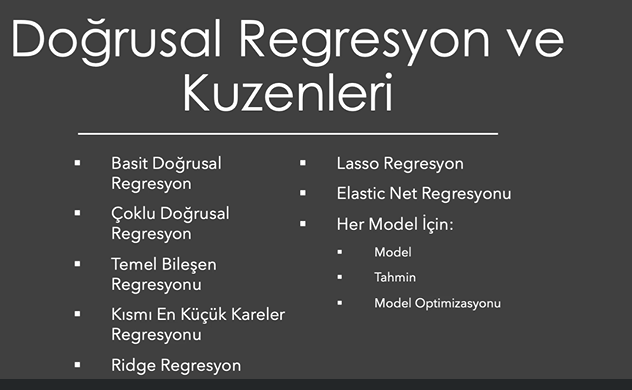

Temel Amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır 

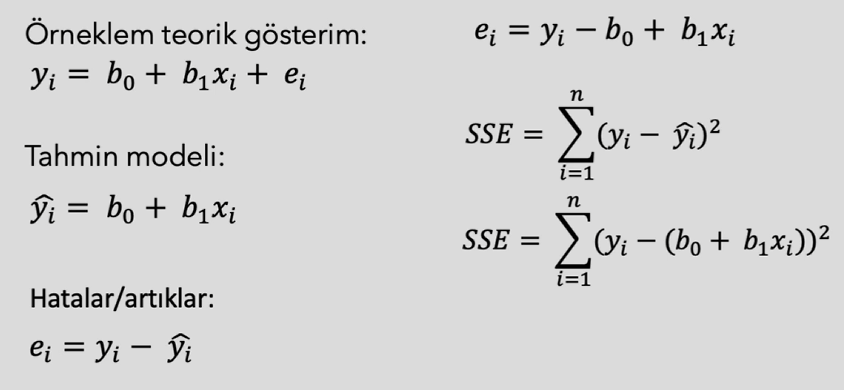

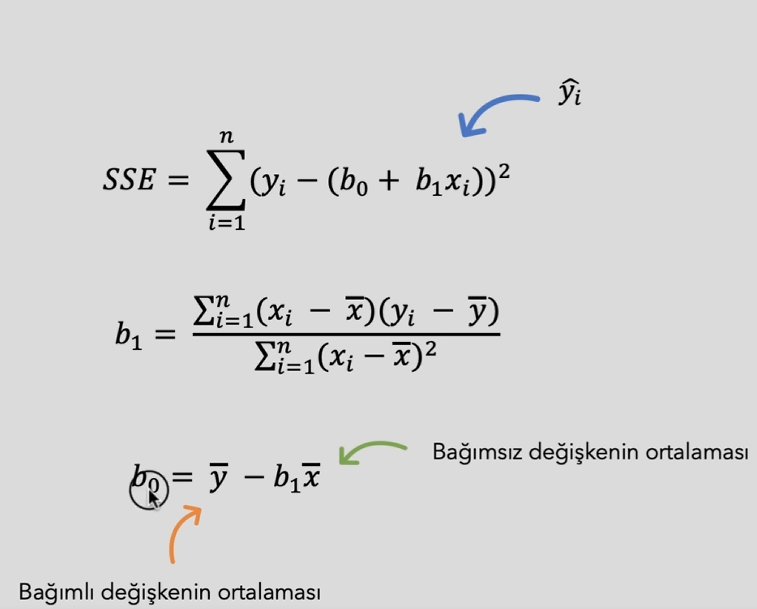

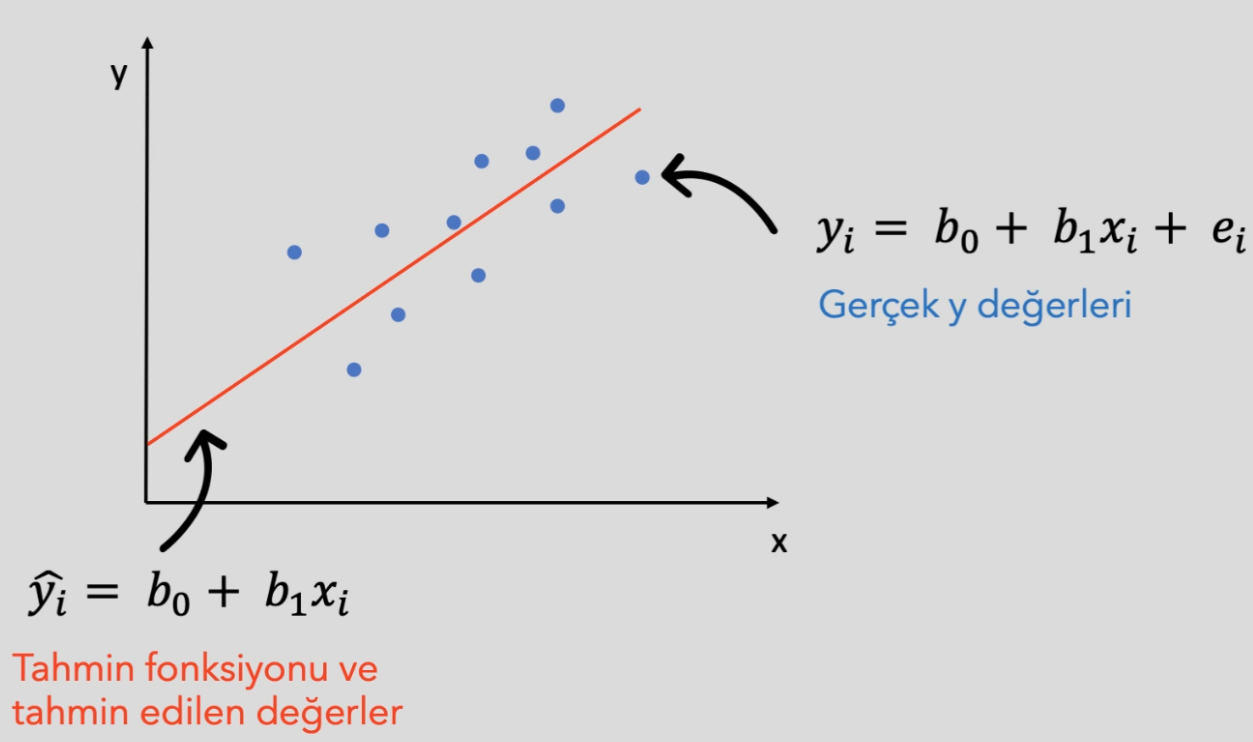

## Kod

### Modelleme

In [500]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
#ad = ad.iloc[":,1:len(df)"] 
df = ad.copy()
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [502]:
df.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

In [503]:
df.isnull().values.any()

False

In [504]:
df.corr()

TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

In [505]:
import seaborn as sns

sns.pairplot(df, kind="reg");

In [506]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [507]:
from warnings import filterwarnings
filterwarnings('ignore')

In [508]:
import statsmodels.api as sm

In [509]:
X = df[["TV"]]
X[:5]

TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8

In [510]:
X = sm.add_constant(X) # bir dsabit ekleniyor yapılacak matris işlemleri için çünkü bizim tek boyutlu bir değişkenimiz var 

In [511]:
X[:5]

const     TV
0    1.0  230.1
1    1.0   44.5
2    1.0   17.2
3    1.0  151.5
4    1.0  180.8

In [512]:
y = df["sales"] # bağımlı değişken 

In [513]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [514]:
lm = sm.OLS(y,X)
model = lm.fit()

In [515]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        02:50:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [516]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        02:50:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [517]:
model.params


Intercept    7.032594
TV           0.047537
dtype: float64

In [518]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [519]:
model.conf_int()

0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843

In [520]:
model.f_pvalue

1.4673897001945906e-42

In [521]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)
print("fvalue: ", "%.2f" % model.fvalue)
print("tvalue: ", "%.2f" % model.tvalues[0:1])

f_pvalue:  0.0000
fvalue:  312.14
tvalue:  15.36


In [522]:
model.rsquared_adj

0.6099148238341623

In [523]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [524]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [525]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


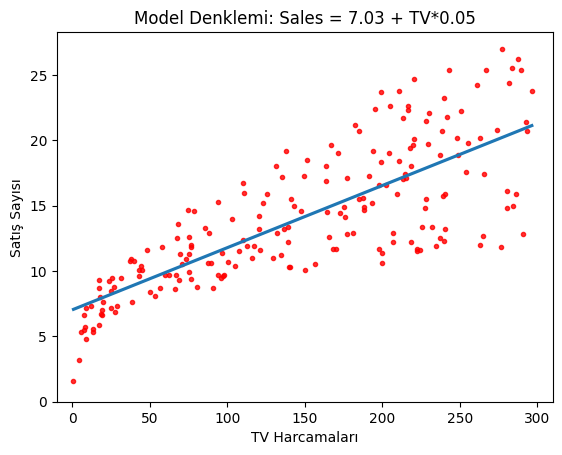

In [526]:
import matplotlib.pyplot as plt

g = sns.regplot(x= df["TV"], y=df["sales"],data=df, ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

plt.xlim(-10,310)
plt.ylim(bottom=0);

In [527]:
from sklearn.linear_model import LinearRegression

In [528]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.04753664])

In [529]:
model.score(X,y)

0.611875050850071

In [530]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

### Tahmin



    
    Model denklemi: Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [531]:
7.03 + 30*0.04

8.23

In [532]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [533]:
model.predict([[30]])

array([8.45869276])

In [534]:
yeni_veri = [[5],[90],[200]]

In [535]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

# Çoklu Doğrusal Regresyon 

## teori

        Temel amaç , Bağımlı ve bağımsız değişkenler arasındaki ilişiyi ifade eden doğrusal fonksiyonu bulmaktır

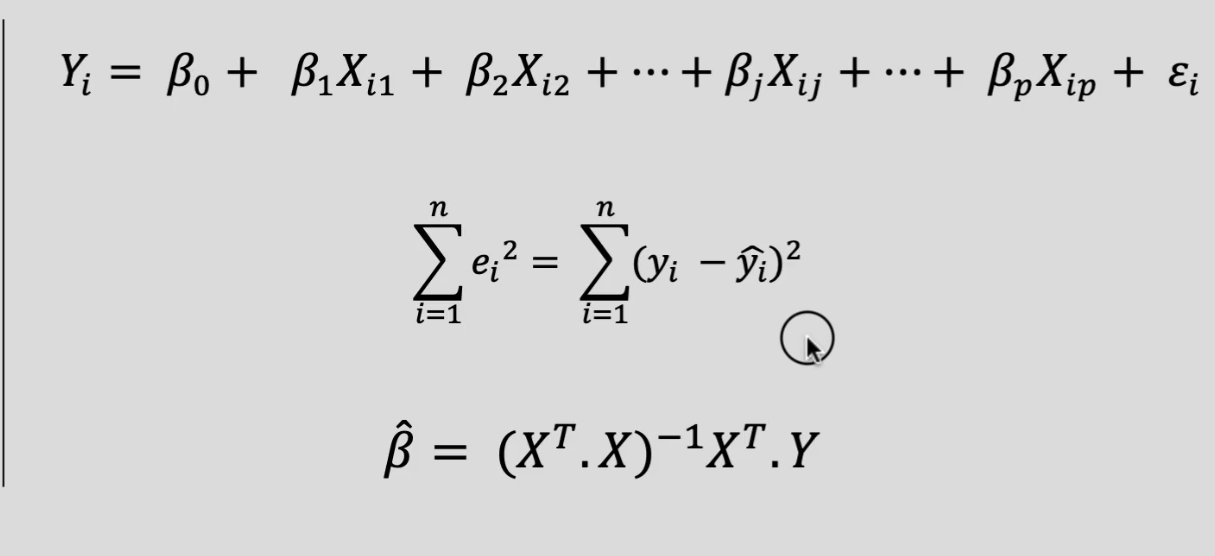

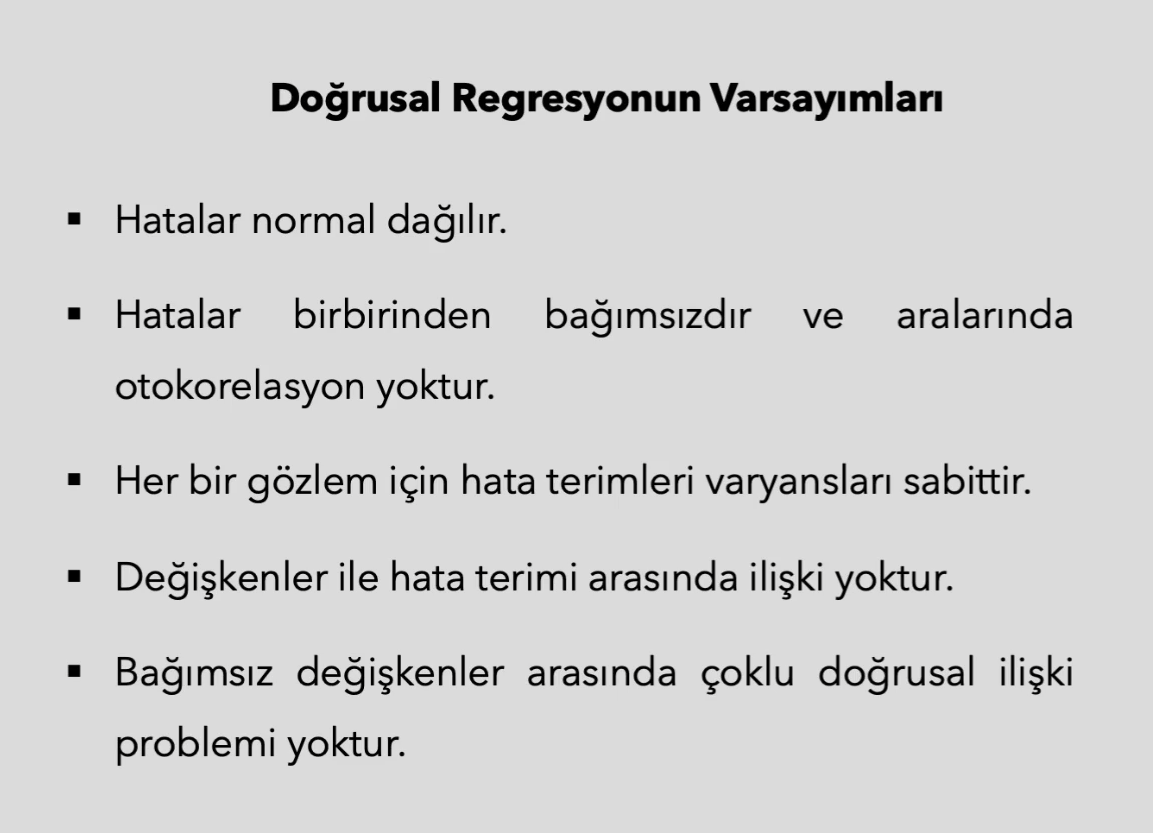

random_statei değiştirdikçe rmse değeri değişir biz modelin belirli bir kısmını seçeceğiz ama hangi kısmını seçeceğiz bunun için cross validation yapacağız 

        Cross-validation (CV), bir makine öğrenimi modelinin performansını değerlendirmek için kullanılan bir yöntemdir. Veri seti, belirli bir sayıda katmana bölünür, her bir katman sırayla test seti olarak kullanılırken geri kalanlar eğitim seti olarak kullanılır. Model her bir katman üzerinde eğitilir ve test edilir. Bu işlem, modelin genel performansını daha güvenilir bir şekilde ölçmek ve aşırı/az öğrenme problemlerini tespit etmek amacıyla kullanılır.

RMSE (Root Mean Squared Error - Kök Ortalama Kare Hata):

        RMSE, bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçen bir hata metriğidir.
        Hesaplanışı: RMSE, her tahminin gerçek değerden olan farkın karesini alır, bu karelerin ortalamasını alır, ardından bu değerin karekökünü alır.
        Daha az hata için daha küçük RMSE değerleri arzu edilir.

MSE (Mean Squared Error - Ortalama Kare Hata):

        MSE, regresyon modelinin tahminlerinin gerçek değerlerden olan farkın karesinin ortalamasını temsil eder.
        Hesaplanışı: MSE, her tahminin gerçek değerden olan farkın karesini alır ve bu değerlerin ortalamasını alır.
        MSE'nin avantajı, hataların karelerini alarak negatif ve pozitif hataları dengelemesidir.

R2 Skoru (Coefficient of Determination - Determinasyon Katsayısı):

        R2 skoru, bağımsız değişkenin bağımlı değişkeni ne kadar iyi açıkladığını ölçen bir metriktir. 1'e ne kadar yakınsa, modelin veriyi o kadar iyi açıkladığı söylenir.
        Hesaplanışı: R2 skoru, varyasyonu açıklanan (model tarafından açıklanan) varyasyonun toplam varyasyona oranını ifade eder.
        1'e yaklaşan R2 skoru daha iyi bir model performansını gösterir, 0 ise modelin hiçbir şey açıklamadığını, negatif değerler ise modelin beklenenden daha kötü performans gösterdiğini gösterir.
        
Özetle, RMSE ve MSE, regresyon modellerinin tahmin hatalarını ölçmek için kullanılırken, R2 skoru modelin genel performansını değerlendirmek için kullanılır.

## Model

In [536]:
import pandas as pd 
import numpy as np
ad = pd.read_csv("Advertising.csv",usecols=[1,2,3,4])
df = ad.copy()
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [537]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict

In [538]:
# salesı dışarıda bırakıp bağımsız değişkenleri seçelim

X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [539]:
X_train.shape, X_test.shape, y_train.shape, y_test .shape

((160, 3), (40, 3), (160,), (40,))

In [540]:
training = df.copy()

## Stats Models

In [541]:
import statsmodels.api as sm

In [542]:
lm = sm.OLS(y_train,X_train)

In [543]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                   1.28e-137
Time:                        02:50:59   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F- statistic: model anlamlı mı değil mi ? 

In [544]:
model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

## scikit-learn model

In [545]:
from sklearn.linear_model import LinearRegression

In [546]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [547]:
print("Katsayılar (Coefficients):", model.coef_)
print("Sabit (Intercept):", model.intercept_)


Katsayılar (Coefficients): [0.04472952 0.18919505 0.00276111]
Sabit (Intercept): 2.9790673381226274


In [548]:
features = np.array([3.5, 1.2, 5.1])

In [549]:
prediction = np.dot(features, model.coef_) + model.intercept_
prediction

3.376736397485359

In [550]:
prediction = 3.5 * 0.04472952 + 1.2 * 0.18919505 + 5.1 * 0.00276111 + 2.9790673381226274
prediction

3.3767363791226273

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [551]:
from sklearn.metrics import mean_squared_error, r2_score

In [552]:
yeni_veri = [[30],[40],[20]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [553]:
model.predict(yeni_veri)

array([11.94397732])

In [554]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [555]:
rmse

1.6447277656443369

In [556]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [557]:
rmse

1.7815996615334502

## Model Tuning / Model Doğrulama 

In [558]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [559]:
# salesı dışarıda bırakıp bağımsız değişkenleri seçelim

X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [560]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.5690343201461154

In [561]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

2.0602536216436182

In [562]:
model.score(X_train,y_train)

0.9095202869396248

random_statei değiştirdikçe rmse değeri değişir biz modelin belirli bir kısmını seçeceğiz ama hangi kısmını seçeceğiz bunun için cross validation yapacağız 

        Cross-validation (CV), bir makine öğrenimi modelinin performansını değerlendirmek için kullanılan bir yöntemdir. Veri seti, belirli bir sayıda katmana bölünür, her bir katman sırayla test seti olarak kullanılırken geri kalanlar eğitim seti olarak kullanılır. Model her bir katman üzerinde eğitilir ve test edilir. Bu işlem, modelin genel performansını daha güvenilir bir şekilde ölçmek ve aşırı/az öğrenme problemlerini tespit etmek amacıyla kullanılır.

RMSE (Root Mean Squared Error - Kök Ortalama Kare Hata):

        RMSE, bir regresyon modelinin tahminlerinin gerçek değerlerden ne kadar uzak olduğunu ölçen bir hata metriğidir.
        Hesaplanışı: RMSE, her tahminin gerçek değerden olan farkın karesini alır, bu karelerin ortalamasını alır, ardından bu değerin karekökünü alır.
        Daha az hata için daha küçük RMSE değerleri arzu edilir.

MSE (Mean Squared Error - Ortalama Kare Hata):

        MSE, regresyon modelinin tahminlerinin gerçek değerlerden olan farkın karesinin ortalamasını temsil eder.
        Hesaplanışı: MSE, her tahminin gerçek değerden olan farkın karesini alır ve bu değerlerin ortalamasını alır.
        MSE'nin avantajı, hataların karelerini alarak negatif ve pozitif hataları dengelemesidir.

R2 Skoru (Coefficient of Determination - Determinasyon Katsayısı):

        R2 skoru, bağımsız değişkenin bağımlı değişkeni ne kadar iyi açıkladığını ölçen bir metriktir. 1'e ne kadar yakınsa, modelin veriyi o kadar iyi açıkladığı söylenir.
        Hesaplanışı: R2 skoru, varyasyonu açıklanan (model tarafından açıklanan) varyasyonun toplam varyasyona oranını ifade eder.
        1'e yaklaşan R2 skoru daha iyi bir model performansını gösterir, 0 ise modelin hiçbir şey açıklamadığını, negatif değerler ise modelin beklenenden daha kötü performans gösterdiğini gösterir.
        
Özetle, RMSE ve MSE, regresyon modellerinin tahmin hatalarını ölçmek için kullanılırken, R2 skoru modelin genel performansını değerlendirmek için kullanılır.

In [563]:
cross_val_score(model, X_train, y_train, cv=10,scoring="r2").mean()

0.8941848619353794

In [564]:
np.sqrt(-cross_val_score(model, X_train, y_train, cv=10,scoring="neg_mean_squared_error")).mean()

1.6266282331157491

In [565]:
np.sqrt(-cross_val_score(model, X_test, y_test, cv=10,scoring="neg_mean_squared_error")).mean()

1.8331194234725376

# PCR- Temel Bileşen regresyonu 

    Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır

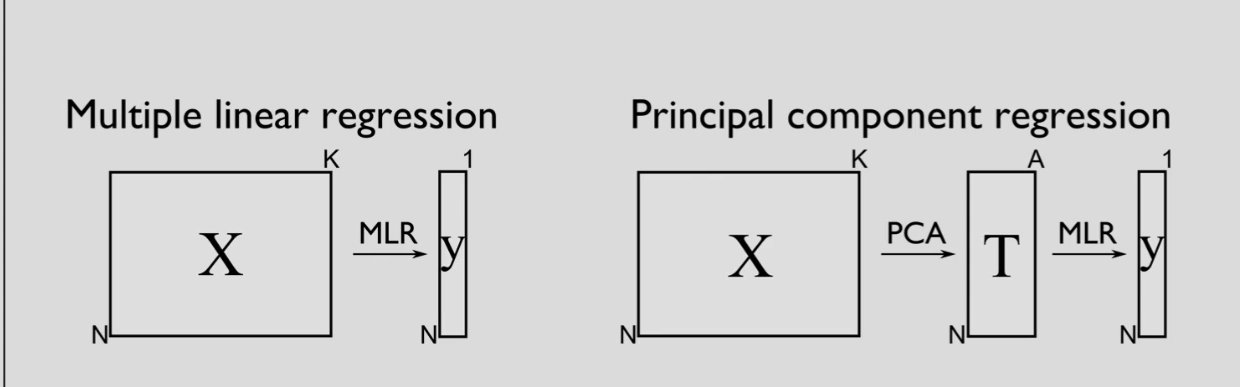

Elimizde P adet değişken olduğunu düşünürsek ve bu P adet değişkenin içerdiği bilginin büyük bir kısmını ondan daha az sayıda değişken ile ifade etme yöntemidir (PCA)

Elimizdeki bu bileşenlere de regresyon uygularsak temel bileşen regresyonu yapmış oluruz 

Çok boyutluluk laneti ortadan kalkıyor 

Çoklu doğrusal bağlatı problemi ortadan kalkmış olur ortaya çıkan değişenler birbiri ile bağlantısız oluyor

## PCR Model


In [566]:
import pandas as pd 
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [568]:
df.describe().T

count         mean          std   min    25%     50%     75%      max
AtBat    263.0   403.642586   147.307209  19.0  282.5   413.0   526.0    687.0
Hits     263.0   107.828897    45.125326   1.0   71.5   103.0   141.5    238.0
HmRun    263.0    11.619772     8.757108   0.0    5.0     9.0    18.0     40.0
Runs     263.0    54.745247    25.539816   0.0   33.5    52.0    73.0    130.0
RBI      263.0    51.486692    25.882714   0.0   30.0    47.0    71.0    121.0
Walks    263.0    41.114068    21.718056   0.0   23.0    37.0    57.0    105.0
Years    263.0     7.311787     4.793616   1.0    4.0     6.0    10.0     24.0
CAtBat   263.0  2657.543726  2286.582929  19.0  842.5  1931.0  3890.5  14053.0
CHits    263.0   722.186312   648.199644   4.0  212.0   516.0  1054.0   4256.0
CHmRun   263.0    69.239544    82.197581   0.0   15.0    40.0    92.5    548.0
CRuns    263.0   361.220532   331.198571   2.0  105.5   250.0   497.5   2165.0
CRBI     263.0   330.418251   323.367668   3.0   95.0   230.0   424.5   1659.0
CWalks   263.0   260.266160   264.055868   1.0   71.0   174.0   328.5   1566.0
PutOuts  263.0   290.711027   279.934575   0.0  113.5   224.0   322.5   1377.0
Assists  263.0   118.760456   145.080577   0.0    8.0    45.0   192.0    492.0
Errors   263.0     8.593156     6.606574   0.0    3.0     7.0    13.0     32.0
Salary   263.0   535.925882   451.118681  67.5  190.0   425.0   750.0   2460.0

In [569]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

League_A  League_N  Division_E  Division_W  NewLeague_A  NewLeague_N
1     False      True       False        True        False         True
2      True     False       False        True         True        False
3     False      True        True       False        False         True
4     False      True        True       False        False         True
5      True     False       False        True         True        False

In [570]:
y = df["Salary"]

In [571]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")

In [572]:
X_.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  
1  321.0  414.0   375.0    632.0     43.0    10.0  
2  224.0  266.0   263.0    880.0     82.0    14.0  
3  828.0  838.0   354.0    200.0     11.0     3.0  
4   48.0   46.0    33.0    805.0     40.0     4.0  
5  501.0  336.0   194.0    282.0    421.0    25.0

In [573]:
X = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

In [574]:
X.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
1  315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
2  479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
3  496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
4  321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
5  594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   

   CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
1  321.0  414.0   375.0    632.0     43.0    10.0      True        True   
2  224.0  266.0   263.0    880.0     82.0    14.0     False        True   
3  828.0  838.0   354.0    200.0     11.0     3.0      True       False   
4   48.0   46.0    33.0    805.0     40.0     4.0      True       False   
5  501.0  336.0   194.0    282.0    421.0    25.0     False        True   

   NewLeague_N  
1         True  
2        False  
3         True  
4         True  
5        False

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_train",y_test.shape)

training = df.copy()
print("training",training.shape)


X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_train (66,)
training (263, 20)


In [576]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [577]:
scale(X_train)[0:1,:]

array([[-0.52262793, -0.36609208,  0.02406249, -0.12266806, -0.34369699,
        -0.40963247, -1.10471461, -0.99114633, -0.945558  , -0.6928145 ,
        -0.91630243, -0.87918027, -0.85228393, -0.52007444, -0.39867767,
        -0.07254437,  1.02571114, -1.02571114,  1.06831847]])

In [578]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [579]:
X_reduced_train.shape

(197, 19)

In [580]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [581]:
# Kümülatif olarak açıklanan varyans
# Bileşen dsyıosı arttıkça verisetindeki orjinal varyansı açıklama oranıda artıyor 
# mesela 19 bileşeni, pca 10 değişken ve 97 variance ile açıklayabiliyor
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [582]:
lm = LinearRegression()

In [583]:
pcr_model = lm.fit(X_reduced_train,y_train)

In [584]:
pcr_model.intercept_

543.4834416243655

In [585]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [586]:
y_pred = pcr_model.predict(X_reduced_train)

In [587]:
y_pred[:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [588]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [589]:
df.Salary.mean()

535.9258821292775

In [590]:
r2_score(y_train, y_pred)

0.5770075250410179

In [591]:
pca2 = PCA()

In [592]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [593]:
y_pred = pcr_model.predict(X_reduced_test)

In [594]:
np.sqrt(mean_squared_error(y_test,y_pred))

405.1575364149963

## Model Tuning 

In [595]:
# Daha önce pca ile indirgenen tüm bileşenler ile deneyler yaptık 
# pca in optimize edilmesi gereken hyper parametresi bileşen sayısıdır
# cross validation ile modeli tune edebilirizz

In [596]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.7914255682224


In [597]:
from sklearn import model_selection

In [598]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [599]:
lm = LinearRegression()

In [600]:
RMSE = []

In [601]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv=cv_10,
                                                       scoring="neg_mean_squared_error").mean())
    
    RMSE.append(score)

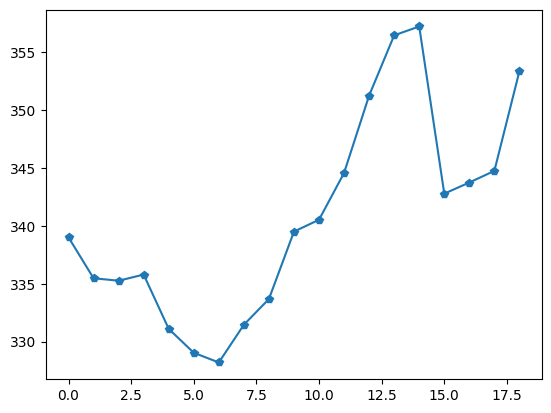

In [602]:
plt.plot(RMSE,"-p")

In [603]:
lm = LinearRegression()

In [604]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [605]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [606]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [607]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [608]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


# PLS-Kısmi En Küçük Kareler Regresyonu 

        Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi
        olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır

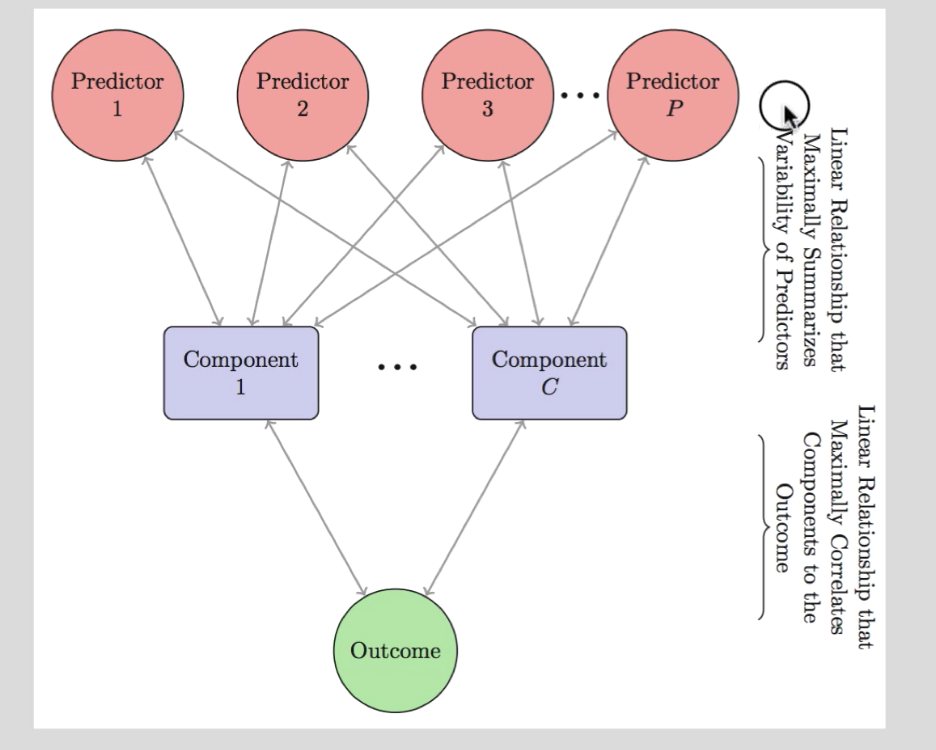

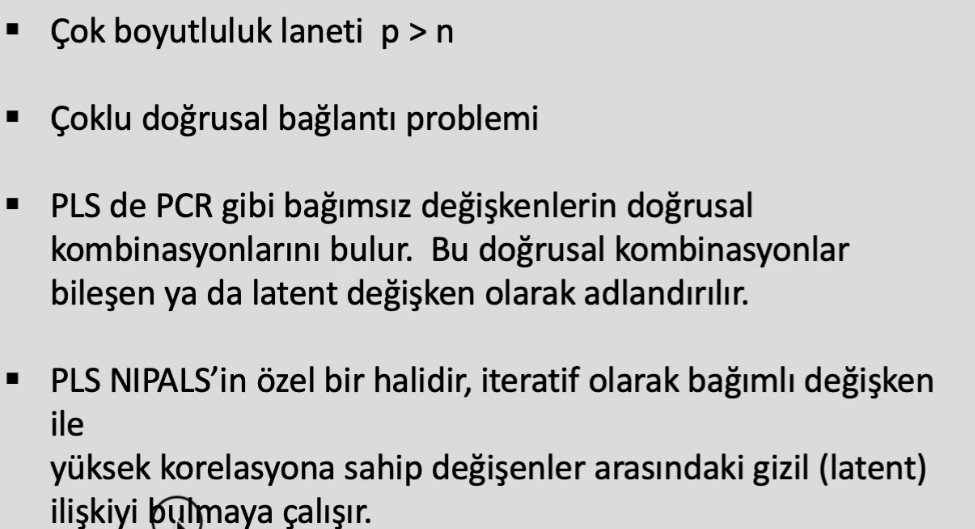
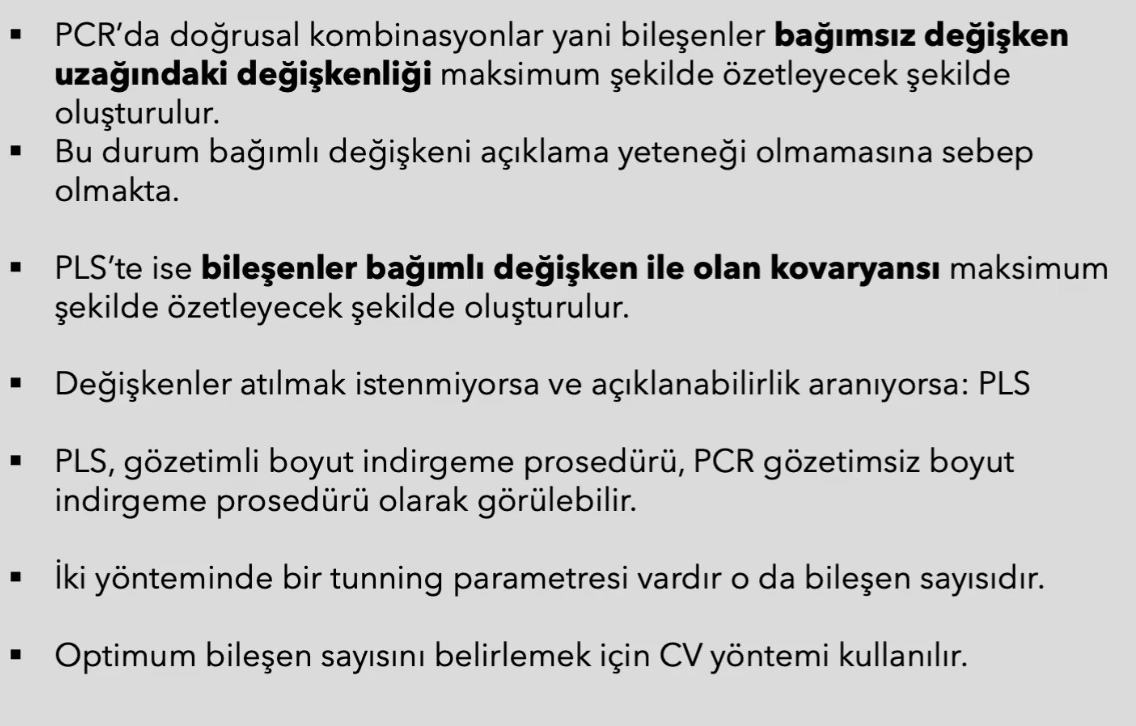

## Model 

In [609]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [610]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [611]:
pls_model = PLSRegression(n_components=2).fit(X_train,y_train)

In [612]:
pls_model.coef_

array([[ 35.32916493,  48.83425857,  18.50240933,  39.28117603,
         30.59952998,  40.03398345,  16.85990516,  28.22289896,
         32.73784993,  22.00875744,  33.60903032,  30.39402522,
         25.73279799,  54.98835148,   6.56590871,  -0.90894359,
         17.60903423, -37.24246339,  14.69680385]])

## Tahmin

In [613]:
pls_model.predict(X_train)[:10]

array([344.91941493, 848.87070769, 692.93622642, 185.56577984,
       435.49196077, 987.49530026, 120.63097106, 289.9263406 ,
       663.41886918, 817.90486641])

In [614]:
y_pred = pls_model.predict(X_train)

In [615]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [616]:
r2_score(y_train, y_pred)

0.5140424486535481

In [617]:
y_pred = pls_model.predict(X_test)

In [618]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

## Model Tunning

In [619]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [620]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [621]:
y_pred = pls_model.predict(X_test)

In [622]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# Ridge Regresyon 

        Amaç hata kareer toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır

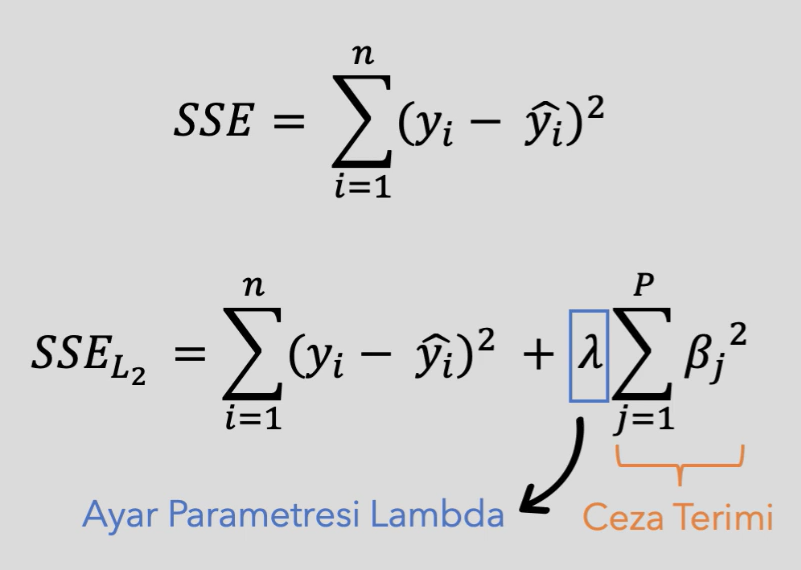

cezalandırmayı kullanıcının kullanması için bir kullanım sunar lambda(ayar parametresi)

 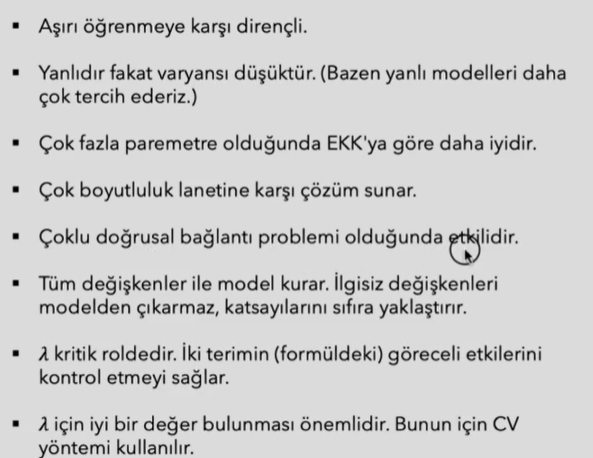
 
 - Çoklu doğrusal regresyon, bir hedef değişkeni ile birden fazla bağımsız değişken arasındaki ilişkiyi tahmin etmek için kullanılan bir istatistiksel tekniktir. Lasso regresyonu, çoklu doğrusal regresyondan farklı olarak, bazı bağımsız değişkenlerin katsayılarını sıfıra yakınlaştırarak modele basitlik sağlar.

 - Aşırı öğrenmeye karşı dirençlidir. Aşırı öğrenme, bir modelin eğitim verilerine çok fazla uyum sağlaması ve yeni verilere genellenememesi durumudur. Lasso regresyonu, modelin karmaşıklığını sınırlayarak aşırı öğrenmeyi azaltmaya yardımcı olur.

- Yanlıdır fakat varyansı düşüktür. Yanlılık, bir modelin gerçek değerleri tahmin etme konusundaki doğruluğunun eksikliğidir. Varyans, bir modelin tahminlerinin değişkenliğidir. Lasso regresyonu, yanlı bir model olmasına rağmen, varyansı düşüktür. Bu, Lasso regresyonunun, gerçek değerleri tahmin etme konusunda daha doğru olabileceği anlamına gelir.

- Çok fazla parametre olduğunda EKK'ya göre daha iyidir. EKK, en küçük kareler yöntemidir. EKK, çok fazla parametreye sahip modellerde aşırı öğrenmeye karşı hassas olabilir. Lasso regresyonu, bu sorunu azaltmaya yardımcı olabilir.

- Çok boyutluluk lanetine karşı çözüm sunar. Çok boyutluluk laneti, çok fazla bağımsız değişkenin olduğu durumlarda modelin performansının kötüleşmesi durumudur. Lasso regresyonu, bu sorunu azaltmaya yardımcı olabilir.

- Çoklu doğrusal bağlantı problemi olduğunda etkilidir. Çoklu doğrusal bağlantı problemi, iki veya daha fazla bağımsız değişkenin birbirine doğrusal olarak ilişkili olduğu durumdur. Bu durum, modelin doğru tahminler yapmasını zorlaştırabilir. Lasso regresyonu, bu sorunu azaltmaya yardımcı olabilir.

-  Lasso regresyonu, modelin karmaşıklığını sınırlamak için bir penalite terimi kullanır. Bu penalite terimi, modelin bazı bağımsız değişkenlerin katsayılarını sıfıra yakınlaştırır.

## Model

In [623]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [624]:
from sklearn.linear_model import Ridge

In [625]:
ridge_model = Ridge(alpha=0.1).fit(X_train,y_train)

In [626]:
ridge_model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [627]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

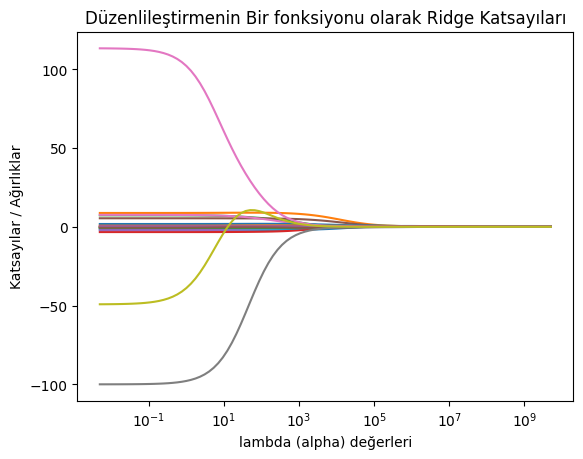

In [628]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')

plt.xlabel("lambda (alpha) değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenlileştirmenin Bir fonksiyonu olarak Ridge Katsayıları");

## Tahmin

In [629]:
y_pred = ridge_model.predict(X_test)

In [630]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.0517922282835

## Model Tunning

In [631]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [632]:
lambdalar[:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [633]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

ridge_cv = make_pipeline(MinMaxScaler(),RidgeCV(alphas=lambdalar, scoring="neg_mean_squared_error"))
ridge_cv.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
                         scoring='neg_mean_squared_error'))])

In [634]:
ridge_alpha =  ridge_cv.named_steps["ridgecv"].alpha_
ridge_alpha

5.361336110051605

In [635]:
ridge_tuned = Ridge(alpha=ridge_alpha).fit(X_train, y_train)

In [636]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

356.3783361054082

# Lasso Regresyon

    Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır
    

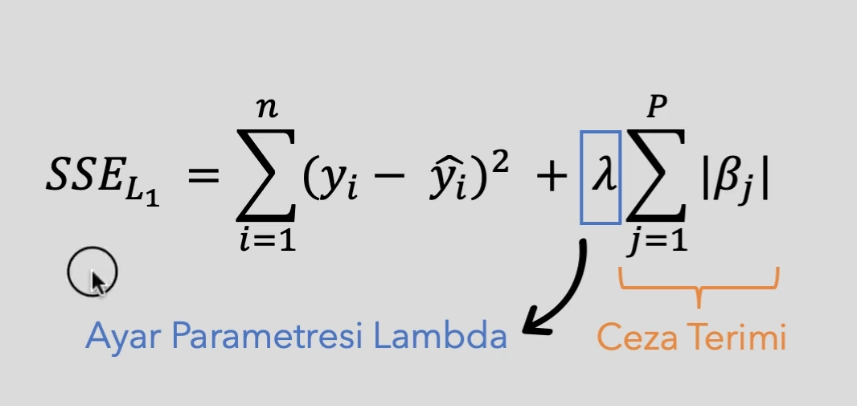


## Model

In [637]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [638]:
from sklearn.linear_model import Lasso

In [639]:
lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

In [640]:
lasso_model.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [641]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

In [642]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Text(0, 0.5, 'weights')

## Tahmin

In [643]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [644]:
y_pred = lasso_model.predict(X_test)

In [645]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.75452701487706

## Model Tuning

In [646]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Assuming your features are stored in X and target variable in y
# X should be a 2D array-like structure (like a DataFrame or numpy array)

# Create a pipeline with StandardScaler and LassoCV
lasso_cv_model = make_pipeline(MinMaxScaler(), LassoCV(alphas=None, cv=10, max_iter=10000))

# Fit the model
lasso_cv_model.fit(X_train, y_train)


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lassocv', LassoCV(cv=10, max_iter=10000))])

In [647]:
lasso_cv_model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('lassocv', LassoCV(cv=10, max_iter=10000))])

In [648]:
lasso_cv_model.get_params()

{'memory': None,
 'steps': [('minmaxscaler', MinMaxScaler()),
  ('lassocv', LassoCV(cv=10, max_iter=10000))],
 'verbose': False,
 'minmaxscaler': MinMaxScaler(),
 'lassocv': LassoCV(cv=10, max_iter=10000),
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'lassocv__alphas': None,
 'lassocv__copy_X': True,
 'lassocv__cv': 10,
 'lassocv__eps': 0.001,
 'lassocv__fit_intercept': True,
 'lassocv__max_iter': 10000,
 'lassocv__n_alphas': 100,
 'lassocv__n_jobs': None,
 'lassocv__positive': False,
 'lassocv__precompute': 'auto',
 'lassocv__random_state': None,
 'lassocv__selection': 'cyclic',
 'lassocv__tol': 0.0001,
 'lassocv__verbose': False}

In [649]:
lasso_cv_model.named_steps

{'minmaxscaler': MinMaxScaler(), 'lassocv': LassoCV(cv=10, max_iter=10000)}

In [650]:
lasso_cv_model.named_steps['lassocv'].alpha_

6.212347689140312

In [651]:
lasso_alpha = lasso_cv_model.named_steps['lassocv'].alpha_
print("Best alpha:", lasso_alpha)


Best alpha: 6.212347689140312


In [652]:
lasso_tuned = Lasso(alpha = lasso_alpha)

In [653]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=6.212347689140312)

In [654]:
y_pred = lasso_tuned.predict(X_test)

In [655]:
np.sqrt(mean_squared_error(y_test, y_pred))

354.737617781377

# ElasticNet Regresyonu

Amaç hata kareler toplamini minimize eden katsayilan bu katsayilara bir ceza uygulayarak
bulmaktir. ElasticNet L1 ve L2 yaklasimlarini birlestirir.

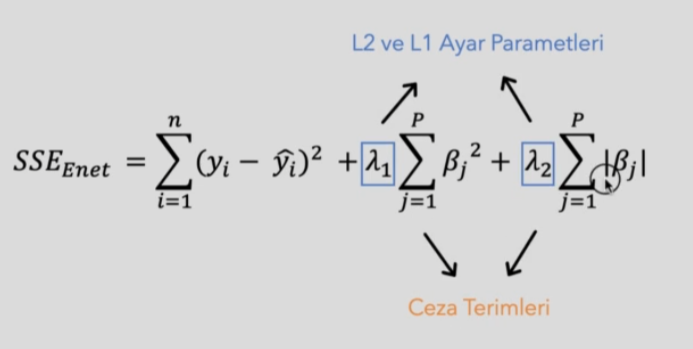

## Model

In [656]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [657]:
from sklearn.linear_model import ElasticNet

In [658]:
enet_model = ElasticNet().fit(X_train, y_train)

In [659]:
len(X.columns)

19

In [660]:
len(enet_model.coef_)

19

In [661]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [662]:
enet_model.intercept_

-6.465955602112217

## Tahmin

In [663]:
enet_model

ElasticNet()

In [664]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [665]:
y_pred = enet_model.predict(X_test)

In [666]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.16765481812445

In [667]:
r2_score(y_test, y_pred)

0.4107022246932692

## Model Tuning

In [668]:
from sklearn.linear_model import ElasticNetCV

In [669]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [670]:
enet_cv_model.alpha_

5230.764736479864

In [671]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [672]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [673]:
y_pred = enet_tuned.predict(X_test)

In [674]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795